# Linnerud exercise

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

## Load data from SciKit
Dataset is multi-output regression data with 3 exercise variables and 3 physiological target variables:
```
Weight Waist Pulse Chins Situps Jumps
```
In this exercise, we'll try to find the relation between waistline and # of situps

[Text(0, 0.5, 'Frequencey of waist (X)'), Text(0.5, 0, 'Waist')]

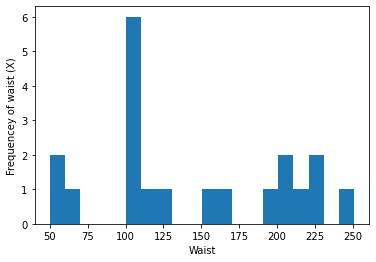

In [80]:
Xorig, yorig = datasets.load_linnerud(return_X_y=True)
# Show histogram of BMI
data_parameter_to_use = 1 # Waist - set from 0 to 2
target_parameter_to_use = 1 # Situps - set from 0 to 2
plt.hist(Xorig[:, data_parameter_to_use], bins=20)
plt.gca().set(ylabel="Frequencey of waist (X)", xlabel="Waist")

The y array shows the physiological parameters based on the data parameters.

We'll use the situps (1) target parameter.

In [81]:
X = Xorig[:, np.newaxis, data_parameter_to_use]
y = yorig[:, target_parameter_to_use]

## Data split
We're splitting the dataset (X and y) into 2 pools, one to train, one to test.

Split is done at the 1/3 mark, resulting in sets of 296 (2/3) and 146 (1/3) mark.

In [82]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

## Training
Now we're going to train our data using linear regression.


<img src="images/regression.png" style="text-align:center" />

In [83]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Our model has been trained now with the test (296 records) data.

Now we'll predict how the test data will behave (remaining 146 records).

In [84]:
y_pred = model.predict(X_test)

I've added the training data as well (pink) for more insight.

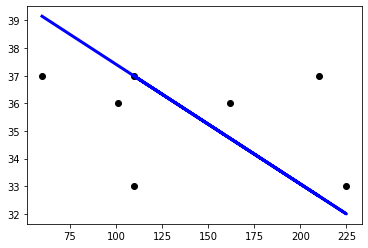

In [85]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

# Conclusion
Waistline has a negative impact on the number of situps that can be done (d'uh).